# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



In [2]:
# Read the csv file into a pandas DataFrame

brain = pd.read_csv('../Resources/brain_categorical.csv')
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


## Working with Categorical Data

What's wrong with the following code?

```
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
```

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

## Putting it all together

### Scikit-learn Pipelines

Package together the preprocessing transformations with the Machine Learning model!

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pandasdummies', PandasDummies()), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [ ]:
model.steps

In [8]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [9]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 4645.2960456792225, R2: 0.6804912531419806


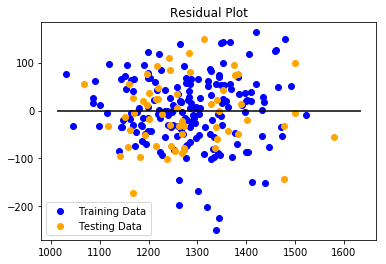

In [10]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

## Saving model

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, "my_model.pkl")

## Loading model

In [ ]:
some_totally_random_model = joblib.load("my_model.pkl")
some_totally_random_model

In [ ]:
some_totally_random_model.steps[-1][1].intercept_

In [ ]:
some_totally_random_model.steps[-1][1].coef_